![](https://image.ibb.co/iPr7g7/tracks.png)
**Preface**

*This notebook is simply to deliver a view of the detector and a single event's path data based on individual particle tracks.*

**Background**
> Physicists from the ATLAS, CMS and LHCb collaborations have just launched the TrackML challenge – your chance to develop new machine-learning solutions for the next generation of particles detectors.
The Large Hadron Collider (LHC) produces hundreds of millions of collisions every second, generating tens of petabytes of data a year. Handling this flood of data is a major challenge for the physicists, who have developed tools to process and filter the events online within a fraction of a second and select the most promising collision events.
[*Challenge Home Page*](https://home.cern/about/updates/2018/05/are-you-trackml-challenge)

**Data**
> Each event contains simulated measurements (essentially 3D points) of particles generated in a collision between proton bunches at the Large Hadron Collider at CERN. 

The two pieces of data on display will be the detector geometry and the tracks of the truth data. 

In [1]:
# Alan Vitullo, May 9,2018
# TML_VA Reconstructor
import numpy as np
import pandas as pd
import os, os.path
# Extract detector geometery
detector_geometery = pd.read_csv('../input/trackml-particle-identification/detectors.csv')
print('Dectector Geometery <size> :', detector_geometery.size)
detector_geometery.head(10)

Dectector Geometery <size> : 393288


volume_id  layer_id  module_id        cx        cy      cz    rot_xu  \
0          7         2          1  -65.7965  -5.17830 -1502.5  0.078459   
1          7         2          2 -139.8510  -6.46568 -1502.0  0.046183   
2          7         2          3 -138.6570 -19.34190 -1498.0  0.138156   
3          7         2          4  -64.1764 -15.40740 -1498.0  0.233445   
4          7         2          5 -136.2810 -32.05310 -1502.0  0.228951   
5          7         2          6  -60.9760 -25.25710 -1502.0  0.382683   
6          7         2          7 -132.7420 -44.49080 -1498.0  0.317791   
7          7         2          8 -128.0710 -56.54890 -1502.0  0.403921   
8          7         2          9  -56.2743 -34.48490 -1497.5  0.522499   
9          7         2         10 -122.3070 -68.12460 -1498.0  0.486604   

     rot_xv  rot_xw    rot_yu   ...     rot_yw  rot_zu  rot_zv  rot_zw  \
0 -0.996917     0.0 -0.996917   ...        0.0       0       0      -1   
1 -0.998933     0.0 -0.998933   ...        0.0       0       0      -1   
2 -0.990410     0.0 -0.990410   ...        0.0       0       0      -1   
3 -0.972370     0.0 -0.972370   ...        0.0       0       0      -1   
4 -0.973438     0.0 -0.973438   ...        0.0       0       0      -1   
5 -0.923880     0.0 -0.923880   ...        0.0       0       0      -1   
6 -0.948161     0.0 -0.948161   ...        0.0       0       0      -1   
7 -0.914794     0.0 -0.914794   ...        0.0       0       0      -1   
8 -0.852640     0.0 -0.852640   ...        0.0       0       0      -1   
9 -0.873622     0.0 -0.873622   ...        0.0       0       0      -1   

   module_t  module_minhu  module_maxhu  module_hv  pitch_u  pitch_v  
0      0.15           8.4           8.4         36     0.05  0.05625  
1      0.15           8.4           8.4         36     0.05  0.05625  
2      0.15           8.4           8.4         36     0.05  0.05625  
3      0.15           8.4           8.4         36     0.05  0.05625  
4      0.15           8.4           8.4         36     0.05  0.05625  
5      0.15           8.4           8.4         36     0.05  0.05625  
6      0.15           8.4           8.4         36     0.05  0.05625  
7      0.15           8.4           8.4         36     0.05  0.05625  
8      0.15           8.4           8.4         36     0.05  0.05625  
9      0.15           8.4           8.4         36     0.05  0.05625  

[10 rows x 21 columns]

In [2]:
# Extract track coordinates
truth_path = pd.read_csv('../input/truth-paths/truth_paths.csv')
print('Truth Path <size> :', truth_path.size)
print('Truth Path <shape> :', truth_path.shape)
truth_path.head(10)

Truth Path <size> : 9058912
Truth Path <shape> : (1132364, 8)


hit_id  lay_id  mod_id  track_id       tx       ty      tz  vol_id
0       1       2       1         0 -65.7965  -5.1783 -1502.5       7
1    1419       2     106         0 -65.7965   5.1783 -1497.5       7
2    1452       4       1         0 -65.7965  -5.1783 -1302.5       7
3    3075       4     104         0 -64.1764  15.4074 -1302.0       7
4    3120       4     106         0 -65.7965   5.1783 -1297.5       7
5    3162       6       1         0 -65.7965  -5.1783 -1102.5       7
6    5087       6     104         0 -64.1764  15.4074 -1102.0       7
7    5121       6     106         0 -65.7965   5.1783 -1097.5       7
8       2       2       1         1 -65.7965  -5.1783 -1502.5       7
9    1505       4       4         1 -64.1764 -15.4074 -1298.0       7

**Imaging**

The first and third image are of the volume/layer/module groups and the second and fourth are of the tracks through the groups.

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
# Set figure width and height
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 40
fig_size[1] = 40
plt.rcParams["figure.figsize"] = fig_size

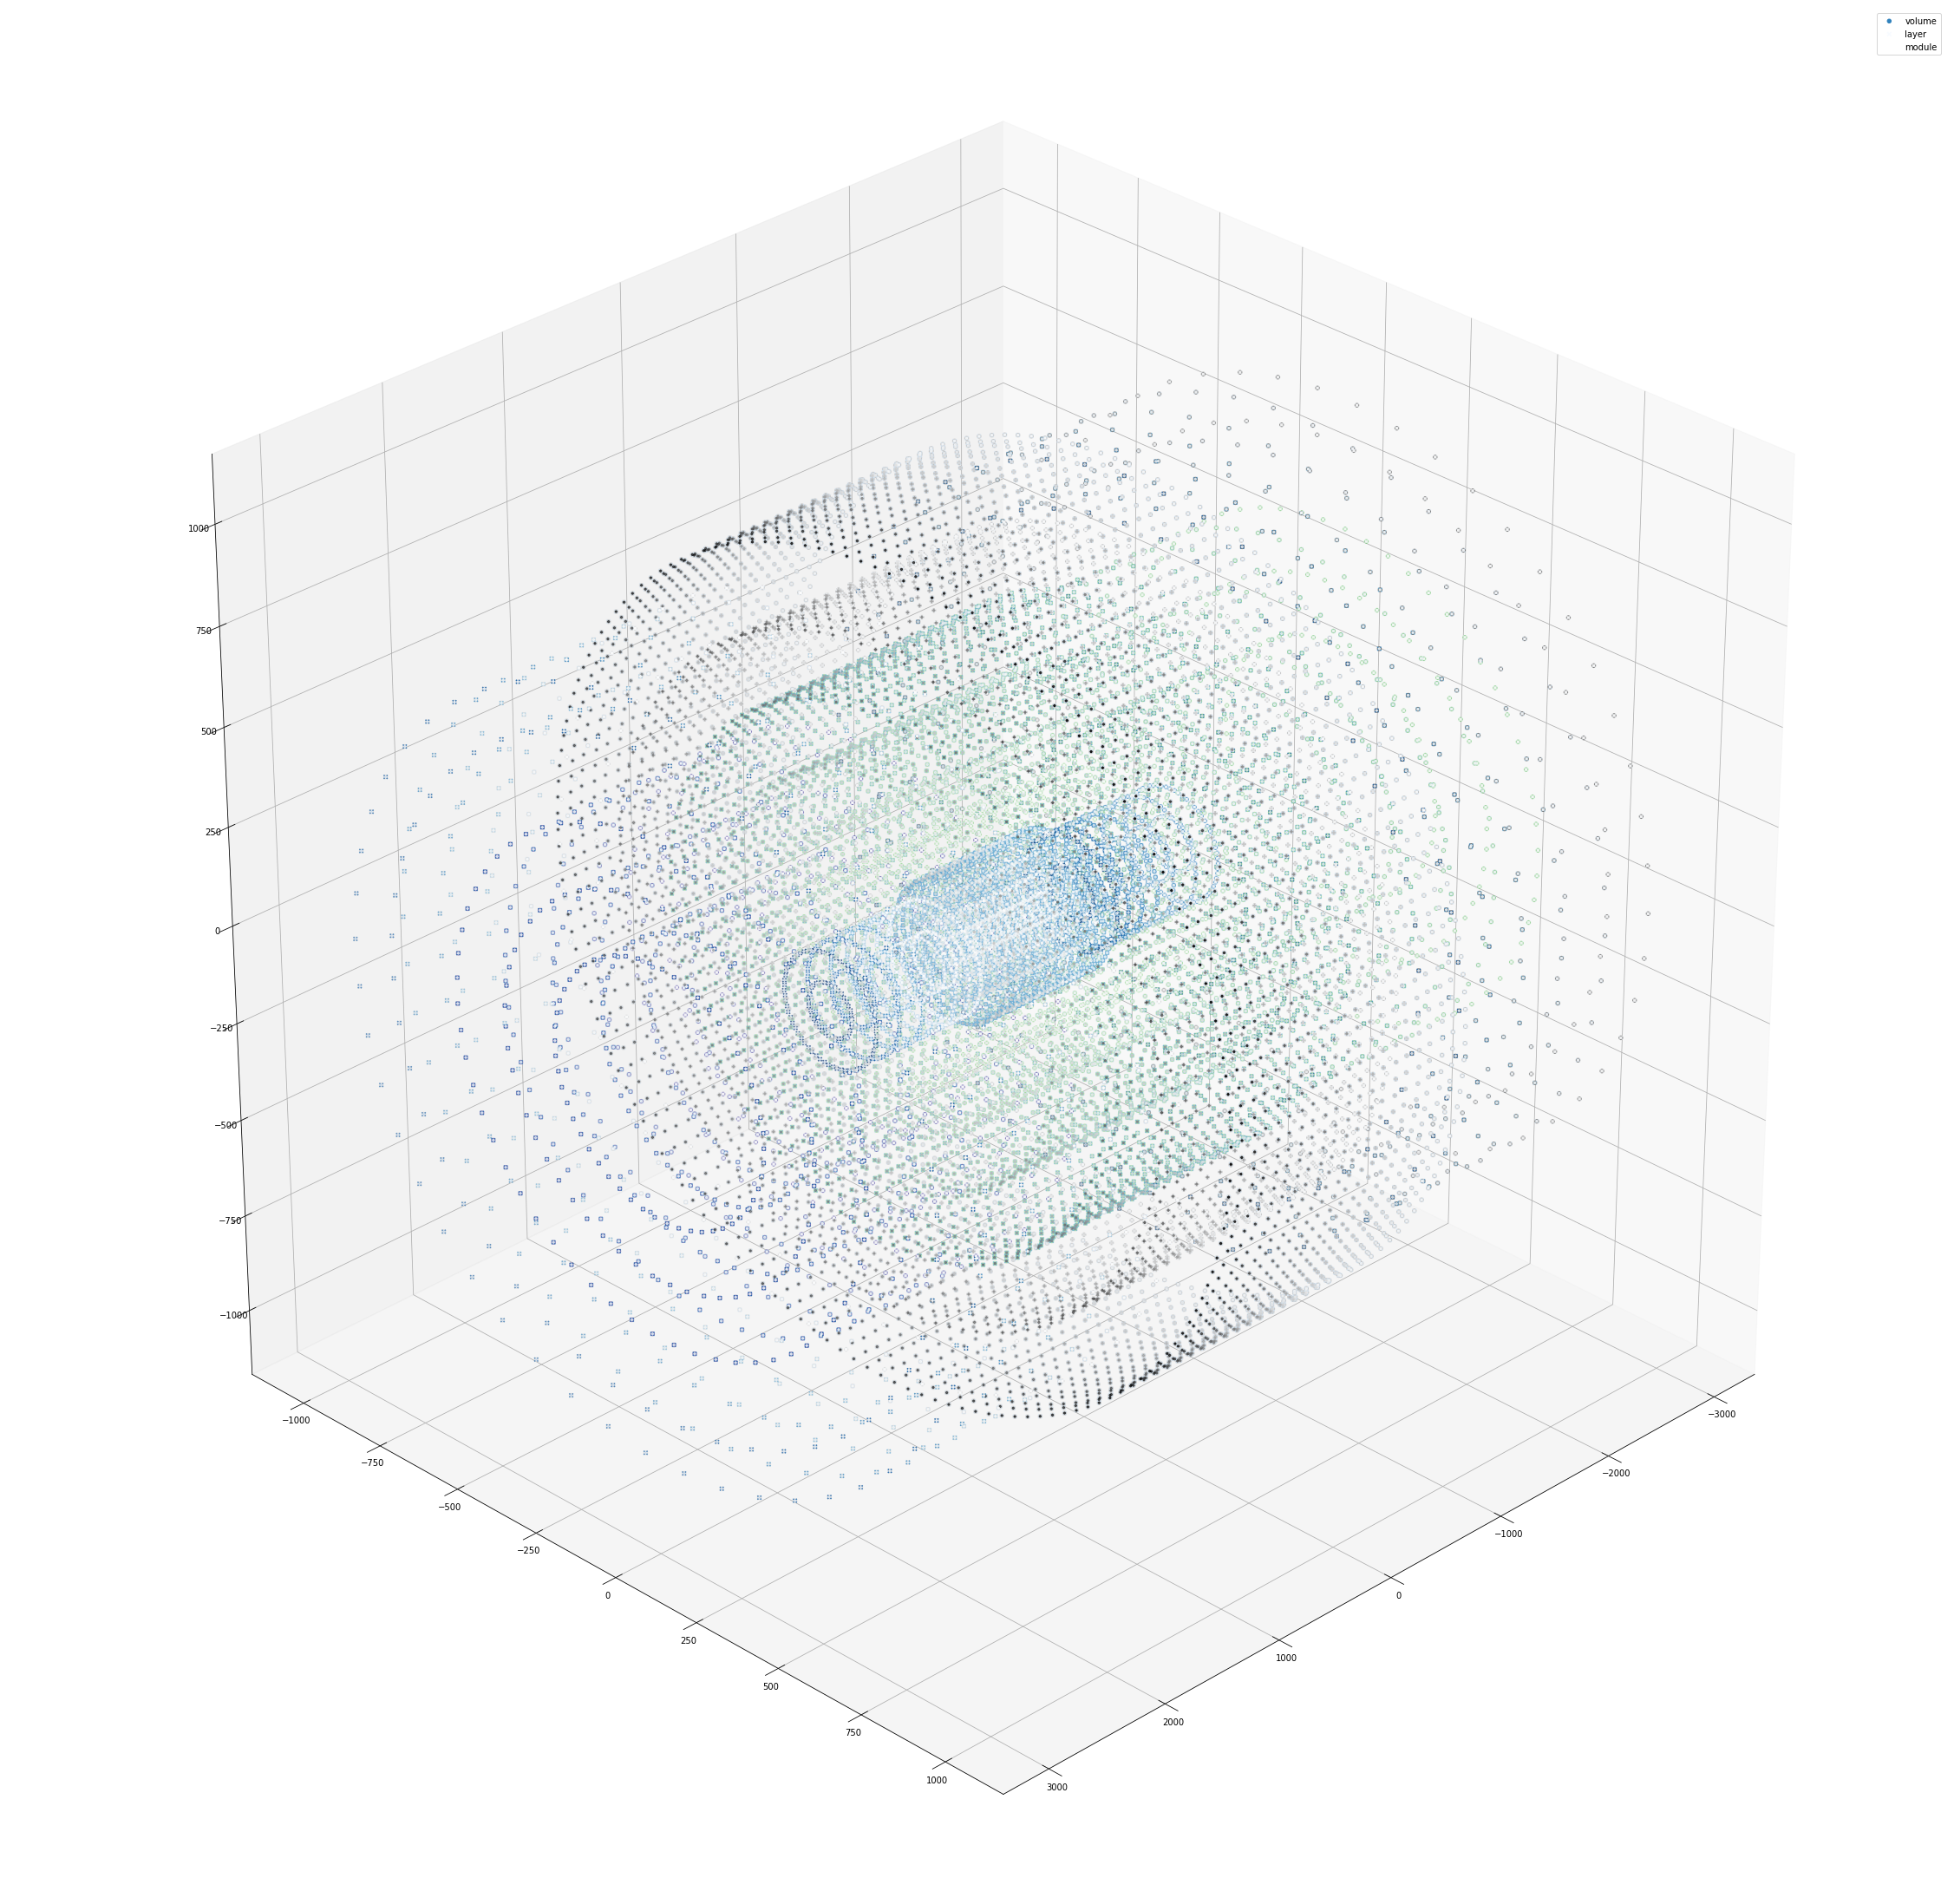

In [14]:
# Create Map
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=45, elev=30)
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.volume_id, cmap='tab20c', marker='o', label='volume')
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.layer_id, cmap='Blues', marker='x', label='layer')
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.module_id, cmap='Greys', marker='.', label='module')
ax.legend()
plt.show()
plt.savefig('detector_ex.png', dpi = 200) #Output

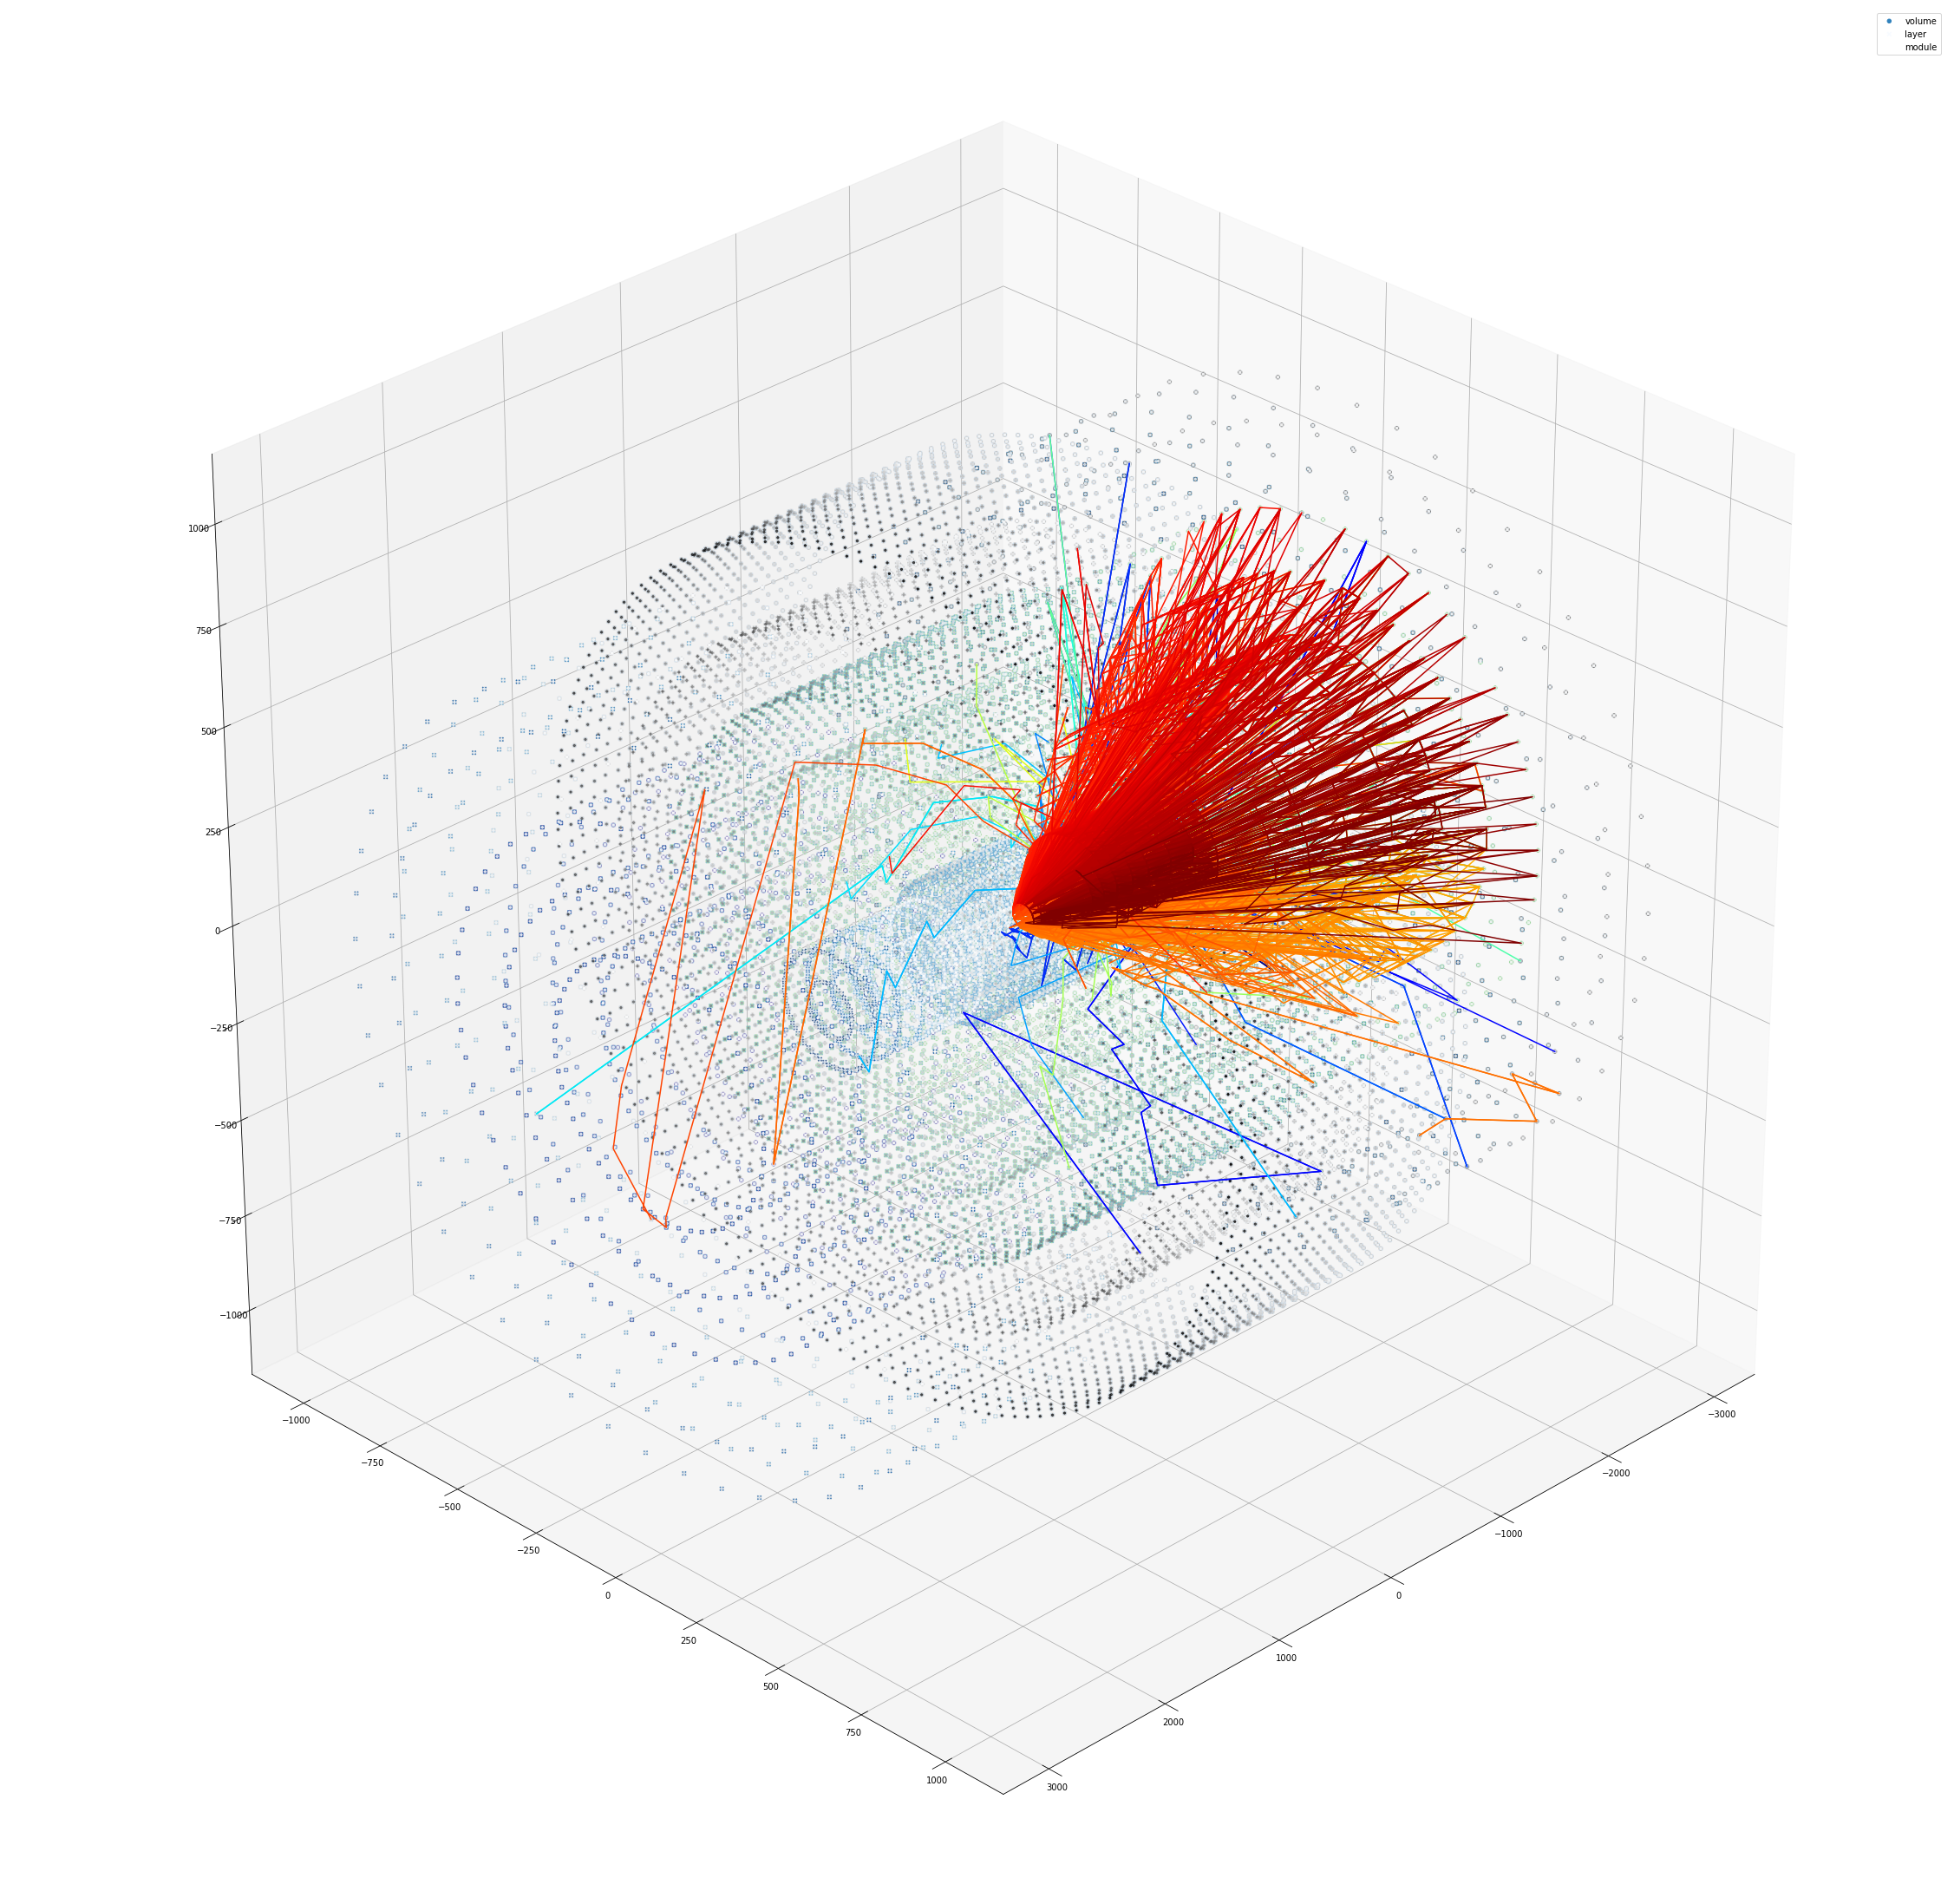

In [11]:
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=45, elev=30)
#
cut_off = (int(truth_path.shape[0]/10))
tp_ind = np.arange(cut_off)
norms = colors.Normalize(vmin=0 , vmax=truth_path.track_id[cut_off])
prev_id = truth_path.track_id[0]
for tpi in tp_ind:
    x = []
    y = []
    z = []
    while(truth_path.track_id[tpi] == prev_id):
        x.append(truth_path.tx[tpi])
        y.append(truth_path.ty[tpi])
        z.append(truth_path.tz[tpi])
        if(truth_path.track_id[tpi+1] != prev_id):
            prev_id = truth_path.track_id[tpi+1]
        else:
            tpi = tpi+1
    ax.plot(z, y, x, c=plt.cm.jet(norms(truth_path.track_id[tpi])) )
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.volume_id, cmap='tab20c', marker='o', label='volume')
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.layer_id, cmap='Blues', marker='x', label='layer')
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.module_id, cmap='Greys', marker='.', label='module')
ax.legend()
plt.show()
plt.savefig('truth_path_ex.png', dpi = 200) #Output

In [ ]:
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=45, elev=30)
#
cut_off = (int(truth_path.shape[0]/5))
tp_ind = np.arange(cut_off)
norms = colors.Normalize(vmin=0 , vmax=truth_path.track_id[cut_off])
prev_id = truth_path.track_id[0]
for tpi in tp_ind:
    x = []
    y = []
    z = []
    while(truth_path.track_id[tpi] == prev_id):
        x.append(truth_path.tx[tpi])
        y.append(truth_path.ty[tpi])
        z.append(truth_path.tz[tpi])
        if(truth_path.track_id[tpi+1] != prev_id):
            prev_id = truth_path.track_id[tpi+1]
        else:
            tpi = tpi+1
    ax.plot(z, y, x, c=plt.cm.jet(norms(truth_path.track_id[tpi])) )
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.volume_id, cmap='tab20c', marker='o', label='volume')
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.layer_id, cmap='Blues', marker='x', label='layer')
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.module_id, cmap='Greys', marker='.', label='module')
ax.legend()
plt.show()
plt.savefig('truth_path_ex.png', dpi = 200) #Output

In [ ]:
# Create Map
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=135, elev=30)
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.volume_id, cmap='Reds', marker='o', label='volume')
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.layer_id, cmap='Blues', marker='x', label='layer')
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.module_id, cmap='Greens', marker='.', label='module')
ax.legend()
plt.show()
plt.savefig('detector_ex180.png', dpi = 200) #Output

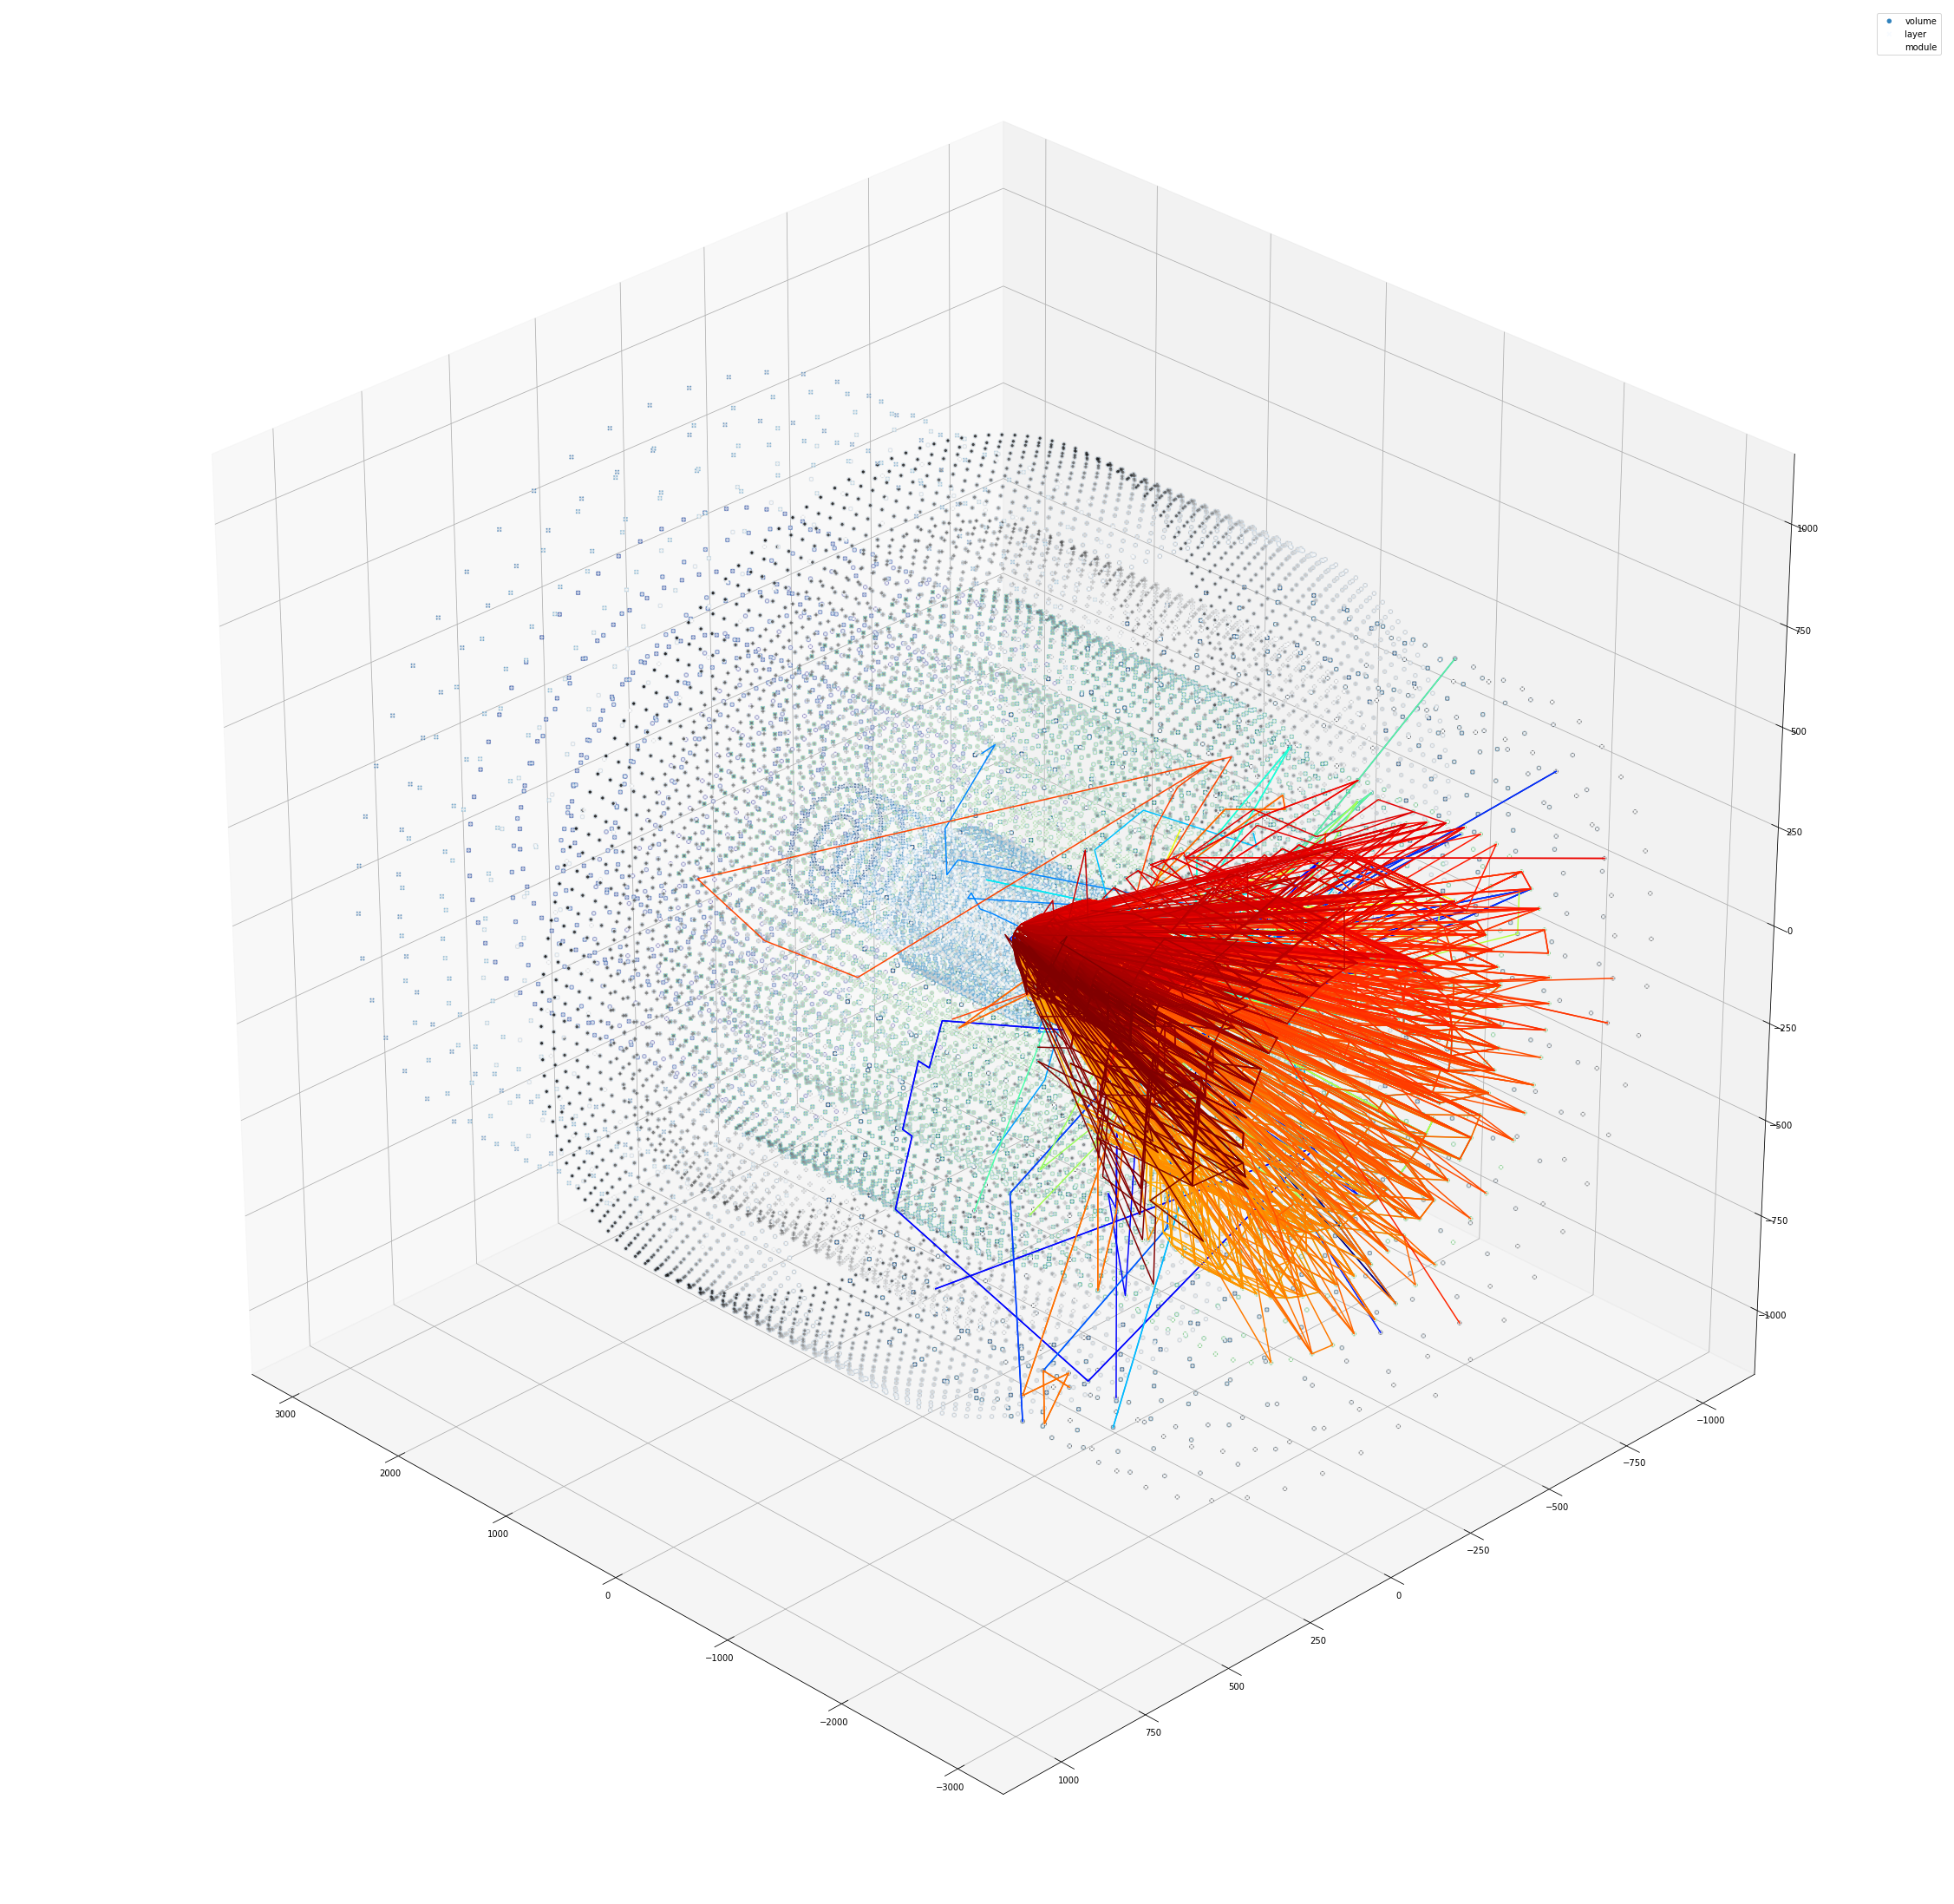

In [12]:
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=135, elev=30)
#
cut_off = (int(truth_path.shape[0]/10))
tp_ind = np.arange(cut_off)
norms = colors.Normalize(vmin=0 , vmax=truth_path.track_id[cut_off])
prev_id = truth_path.track_id[0]
for tpi in tp_ind:
    x = []
    y = []
    z = []
    while(truth_path.track_id[tpi] == prev_id):
        x.append(truth_path.tx[tpi])
        y.append(truth_path.ty[tpi])
        z.append(truth_path.tz[tpi])
        if(truth_path.track_id[tpi+1] != prev_id):
            prev_id = truth_path.track_id[tpi+1]
        else:
            tpi = tpi+1
    ax.plot(z, y, x, c=plt.cm.jet(norms(truth_path.track_id[tpi])) )
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.volume_id, cmap='tab20c', marker='o', label='volume')
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.layer_id, cmap='Blues', marker='x', label='layer')
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.module_id, cmap='Greys', marker='.', label='module')
ax.legend()
plt.show()
plt.savefig('truth_path_ex180.png', dpi = 200) #Output

In [ ]:
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=135, elev=30)
#
cut_off = (int(truth_path.shape[0]/5))
tp_ind = np.arange(cut_off)
norms = colors.Normalize(vmin=0 , vmax=truth_path.track_id[cut_off])
prev_id = truth_path.track_id[0]
for tpi in tp_ind:
    x = []
    y = []
    z = []
    while(truth_path.track_id[tpi] == prev_id):
        x.append(truth_path.tx[tpi])
        y.append(truth_path.ty[tpi])
        z.append(truth_path.tz[tpi])
        if(truth_path.track_id[tpi+1] != prev_id):
            prev_id = truth_path.track_id[tpi+1]
        else:
            tpi = tpi+1
    ax.plot(z, y, x, c=plt.cm.jet(norms(truth_path.track_id[tpi])) )
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.volume_id, cmap='tab20c', marker='o', label='volume')
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.layer_id, cmap='Blues', marker='x', label='layer')
ax.scatter(detector_geometery.cz, detector_geometery.cy, detector_geometery.cx, c=detector_geometery.module_id, cmap='Greys', marker='.', label='module')
ax.legend()
plt.show()
plt.savefig('truth_path_ex180.png', dpi = 200) #Output

**Final Thoughts**

I had to cut the path total in 1/4 because of plotting overhead.

**Acknowledgements**

Thank you [Moritz Kiehn](https://www.kaggle.com/msmk00) for the trackml lib.